# Задание 1

[Свертка списка](https://ru.wikipedia.org/wiki/%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BA%D0%B0_%D1%81%D0%BF%D0%B8%D1%81%D0%BA%D0%B0) -  это обобщенная операция над списком, c помощью которой можно преобразовать список в единое значение. Например, рассмотрим реализации свертки слева и свертки справа (левоассоциативную свертку и правоассоциативную свертку):

In [1]:
def foldl(f, x0, lst):
    print(f, x0, lst)
    if not lst:
        return x0
    return foldl(f, f(x0, lst[0]), lst[1:])

def foldr(f, x0, lst):
    print(f, x0, lst)
    if not lst:
        return x0
    return f(lst[0], foldr(f, x0, lst[1:]))

In [2]:
#сумма
foldl(lambda x, y: x + y, 0, [1, 2, 3]), foldr(lambda x, y: x + y, 0, [1, 2, 3])

<function <lambda> at 0x000001D6735232F0> 0 [1, 2, 3]
<function <lambda> at 0x000001D6735232F0> 1 [2, 3]
<function <lambda> at 0x000001D6735232F0> 3 [3]
<function <lambda> at 0x000001D6735232F0> 6 []
<function <lambda> at 0x000001D6735232F0> 0 [1, 2, 3]
<function <lambda> at 0x000001D6735232F0> 0 [2, 3]
<function <lambda> at 0x000001D6735232F0> 0 [3]
<function <lambda> at 0x000001D6735232F0> 0 []


(6, 6)

In [3]:
#конкатенация
foldl(lambda x, y: '{}{}'.format(x, y), '', [1, 2, 3]), foldr(lambda x, y: '{}{}'.format(x, y), '', [1, 2, 3])

<function <lambda> at 0x000001D673523598>  [1, 2, 3]
<function <lambda> at 0x000001D673523598> 1 [2, 3]
<function <lambda> at 0x000001D673523598> 12 [3]
<function <lambda> at 0x000001D673523598> 123 []
<function <lambda> at 0x000001D673523598>  [1, 2, 3]
<function <lambda> at 0x000001D673523598>  [2, 3]
<function <lambda> at 0x000001D673523598>  [3]
<function <lambda> at 0x000001D673523598>  []


('123', '123')

In [4]:
f = lambda x, y: x / y
foldl(f, 1, [1, 2, 3]), \
foldr(f, 1, [1, 2, 3])

<function <lambda> at 0x000001D673523A60> 1 [1, 2, 3]
<function <lambda> at 0x000001D673523A60> 1.0 [2, 3]
<function <lambda> at 0x000001D673523A60> 0.5 [3]
<function <lambda> at 0x000001D673523A60> 0.16666666666666666 []
<function <lambda> at 0x000001D673523A60> 1 [1, 2, 3]
<function <lambda> at 0x000001D673523A60> 1 [2, 3]
<function <lambda> at 0x000001D673523A60> 1 [3]
<function <lambda> at 0x000001D673523A60> 1 []


(0.16666666666666666, 1.5)

Задача: реализовать foldl через foldr и наоборот. Вместо многоточий нужно вставить выражения, которые бы привели к нужному результату.

In [5]:
def foldl2(f, x0, lst):
    return foldr(..., ..., lst)(...)

In [6]:
def foldr2(f, x0, lst):
    return foldl(..., ..., lst)(...)

# Решение

In [7]:
# foldl: (f ... (f (f start elem_1) elem_2) ... elem_n), 
# foldr: (f elem_1 (f elem_2 ... (f elem_n start) ... ))

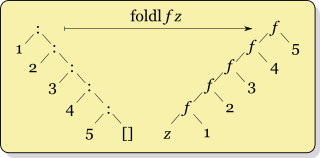

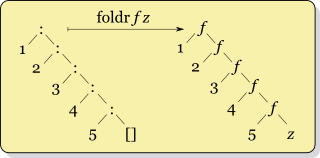

# https://eli.thegreenplace.net/2017/right-and-left-folds-primitive-recursion-patterns-in-python-and-haskell/

In [8]:
def foldl2(f, x0, lst):
    return foldr(lambda x, fn: lambda y: fn(f(y, x)), lambda x: x, lst)(x0)

In [9]:
def foldr2(f, x0, lst):
    return foldl(lambda fn, x: lambda y: fn(f(x, y)), lambda x: x, lst)(x0)

In [10]:
f = lambda x, y: x / y
foldl(f, 1, [1, 2, 3]), \
foldl2(f, 1, [1, 2, 3]), \
foldr(f, 1, [1, 2, 3]), \
foldr2(f, 1, [1, 2, 3])

<function <lambda> at 0x000001D673523E18> 1 [1, 2, 3]
<function <lambda> at 0x000001D673523E18> 1.0 [2, 3]
<function <lambda> at 0x000001D673523E18> 0.5 [3]
<function <lambda> at 0x000001D673523E18> 0.16666666666666666 []
<function foldl2.<locals>.<lambda> at 0x000001D673554730> <function foldl2.<locals>.<lambda> at 0x000001D6735547B8> [1, 2, 3]
<function foldl2.<locals>.<lambda> at 0x000001D673554730> <function foldl2.<locals>.<lambda> at 0x000001D6735547B8> [2, 3]
<function foldl2.<locals>.<lambda> at 0x000001D673554730> <function foldl2.<locals>.<lambda> at 0x000001D6735547B8> [3]
<function foldl2.<locals>.<lambda> at 0x000001D673554730> <function foldl2.<locals>.<lambda> at 0x000001D6735547B8> []
<function <lambda> at 0x000001D673523E18> 1 [1, 2, 3]
<function <lambda> at 0x000001D673523E18> 1 [2, 3]
<function <lambda> at 0x000001D673523E18> 1 [3]
<function <lambda> at 0x000001D673523E18> 1 []
<function foldr2.<locals>.<lambda> at 0x000001D6735501E0> <function foldr2.<locals>.<lambd

(0.16666666666666666, 0.16666666666666666, 1.5, 1.5)

In [11]:
f = lambda x, y: x + y
foldl(f, 0, [1, 2, 3]), \
foldl2(f, 0, [1, 2, 3]), \
foldr(f, 0, [1, 2, 3]), \
foldr2(f, 0, [1, 2, 3])

<function <lambda> at 0x000001D6735238C8> 0 [1, 2, 3]
<function <lambda> at 0x000001D6735238C8> 1 [2, 3]
<function <lambda> at 0x000001D6735238C8> 3 [3]
<function <lambda> at 0x000001D6735238C8> 6 []
<function foldl2.<locals>.<lambda> at 0x000001D673550730> <function foldl2.<locals>.<lambda> at 0x000001D6735507B8> [1, 2, 3]
<function foldl2.<locals>.<lambda> at 0x000001D673550730> <function foldl2.<locals>.<lambda> at 0x000001D6735507B8> [2, 3]
<function foldl2.<locals>.<lambda> at 0x000001D673550730> <function foldl2.<locals>.<lambda> at 0x000001D6735507B8> [3]
<function foldl2.<locals>.<lambda> at 0x000001D673550730> <function foldl2.<locals>.<lambda> at 0x000001D6735507B8> []
<function <lambda> at 0x000001D6735238C8> 0 [1, 2, 3]
<function <lambda> at 0x000001D6735238C8> 0 [2, 3]
<function <lambda> at 0x000001D6735238C8> 0 [3]
<function <lambda> at 0x000001D6735238C8> 0 []
<function foldr2.<locals>.<lambda> at 0x000001D673556158> <function foldr2.<locals>.<lambda> at 0x000001D6735561

(6, 6, 6, 6)

In [12]:
f = lambda x, y: '{}{}'.format(x, y)
foldl(f, '', [1, 2, 3]), \
foldl2(f, '', [1, 2, 3]), \
foldr(f, '', [1, 2, 3]), \
foldr2(f, '', [1, 2, 3])


<function <lambda> at 0x000001D673523F28>  [1, 2, 3]
<function <lambda> at 0x000001D673523F28> 1 [2, 3]
<function <lambda> at 0x000001D673523F28> 12 [3]
<function <lambda> at 0x000001D673523F28> 123 []
<function foldl2.<locals>.<lambda> at 0x000001D673556730> <function foldl2.<locals>.<lambda> at 0x000001D6735567B8> [1, 2, 3]
<function foldl2.<locals>.<lambda> at 0x000001D673556730> <function foldl2.<locals>.<lambda> at 0x000001D6735567B8> [2, 3]
<function foldl2.<locals>.<lambda> at 0x000001D673556730> <function foldl2.<locals>.<lambda> at 0x000001D6735567B8> [3]
<function foldl2.<locals>.<lambda> at 0x000001D673556730> <function foldl2.<locals>.<lambda> at 0x000001D6735567B8> []
<function <lambda> at 0x000001D673523F28>  [1, 2, 3]
<function <lambda> at 0x000001D673523F28>  [2, 3]
<function <lambda> at 0x000001D673523F28>  [3]
<function <lambda> at 0x000001D673523F28>  []
<function foldr2.<locals>.<lambda> at 0x000001D6735521E0> <function foldr2.<locals>.<lambda> at 0x000001D673552268

('123', '123', '123', '123')

# Задание 2

нужно написать функцию, которая принимает две строки и проверяет, входит ли хотя бы одна перестановка второй строки в первую. Например:

> a = 'abcrotm'
> 
> b = 'tro'

функция def check_inv(a, b) вернет True, так как 'rot' содержится в 'abcrotm'. Нужно подумать как можно более оптимальный алгоритм и оценить его сложность. 

In [2]:
def check_inv(a, b):
    pass

# Решение

In [10]:
def check_inv(a, b):
    b_copy = list(b)
    for i, _ in enumerate(a):
        if a[i] in b_copy:
            b_copy.remove(a[i])
            if not b_copy:
                return True
        else:
            b_copy = list(b)
    return False

In [11]:
a = 'abcrotm'
b = 'tro'
check_inv(a, b)

['t', 'o', 'o']
['t', 'o']
['o']


False

# Задание 3

Реализовать бинарное дерево (класс Tree), в нём методы __repr__, __str__, __iter__ (итерация только по листьям).

In [88]:
# class Tree:
#     def __init__(self, value=None, left=None, right=None):
#         self.left = left
#         self.right = right
#         self.value = value
        
#     def __iter__(self):
#         pass
    
#     def __str__(self):
#         pass
    
#     def __repr__(self):
#         pass
    
# tree = Tree(0, Tree(1, Tree(3), Tree(4)),                             
#                Tree(2))

# list(tree) == [3, 4, 2]

# Решение

In [18]:
class Tree:
    def __init__(self, value=None, left=None, right=None):
        self.left = left
        self.right = right
        self.value = value
        
    def __iter__(self):
        
        iter_lst = list()
        def iter_rec(tree):
            if tree.left:
                iter_rec(tree.left)
            if tree.right:
                iter_rec(tree.right)
            if (tree.left == None and tree.right == None ):
                iter_lst.append(tree.value)
        iter_rec(self)
        
        return iter(iter_lst)
        
    
    def __str__(self):   
        
        string = str(self.value)        
        if self.left:
            string += '(' +  str(self.left) + ')'
        if self.right:
            string += '(' +  str(self.right) + ')'
       
        return( string )
   
    def __repr__(self):
        
        string = 'Tree(' + str(self.value)
        if self.left:
            string += ', ' +  repr(self.left)
        if self.right:
            string += ', ' + repr(self.right) 
        string += ')'

        return(string)


In [19]:
tree = Tree(0, Tree(1, Tree(3), Tree(4)),                             
               Tree(2))
print(tree)

0(1(3)(4))(2)


In [20]:
repr(tree)

'Tree(0, Tree(1, Tree(3), Tree(4)), Tree(2))'

In [21]:
list(tree) == [3, 4, 2]

True

# Задание 4

Реализовать простейший калькулятор математических выражений:
- только целые числа
- **+**, **\-**, **\***, **\**
- скобки

**Можно использовать регулярные выражения**

In [ ]:
def calc(expr):
    pass

calc('2 * (15 - 3 * 4) - 2') == 4

# Решение